# Alex Bombrun

In [1]:
%matplotlib inline

In [2]:
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
mp.rcParams['figure.figsize'] = (12, 8)

In [4]:
pwd

'/Users/abombrun/Documents/GitHub/GaiaFun'

In [6]:
from astropy.table import Table 
url="http://vospace.esac.esa.int/vospace/sh/1875f1bc648b5e7fc67aab9e45a19589f9c5ecd?dl=1"

t = Table.read(url,format='votable')

d = t.to_pandas()

d.to_csv("~/tmp/data/Ocloud.csv")

In [7]:
d = pd.read_csv("~/tmp/data/Ocloud.csv")

/Users/abombrun/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (96) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
d.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69385 entries, 0 to 69384
Columns: 97 entries, Unnamed: 0 to epoch_photometry_url
dtypes: bool(2), float64(90), int64(1), object(4)
memory usage: 50.4+ MB


In [9]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle

In [10]:
#catPaw = SkyCoord.from_name("Cat’s Paw Nebula")
LDN1688 =  SkyCoord.from_name("Ophiuchus Molecular Cloud")
M4 = SkyCoord.from_name("M4")
M80 =  SkyCoord.from_name("M80")
Antares = SkyCoord.from_name("Antares")
NGC6144 =SkyCoord.from_name("NGC6144")
#X1 = SkyCoord.from_name("Scorpius-X-1")

In [11]:
d.columns

Index(['Unnamed: 0', 'solution_id', 'designation', 'source_id', 'random_index',
       'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr',
       'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error',
       'mean_varpi_factor_al', 'astrometric_matched_observations',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'frame_rotator

In [12]:
d.parallax.count()

69385

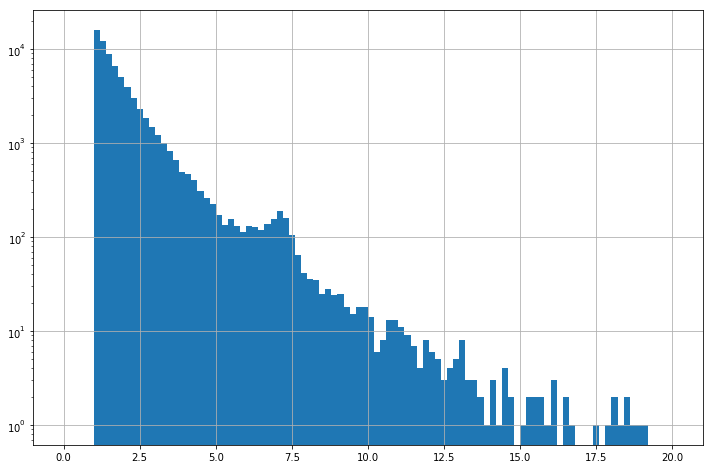

In [13]:
d.parallax.hist(bins=100,range=(0,20))
plt.yscale('log')

the magnitude distribution is representative of Gaia detection limit around G = 21 [mag]

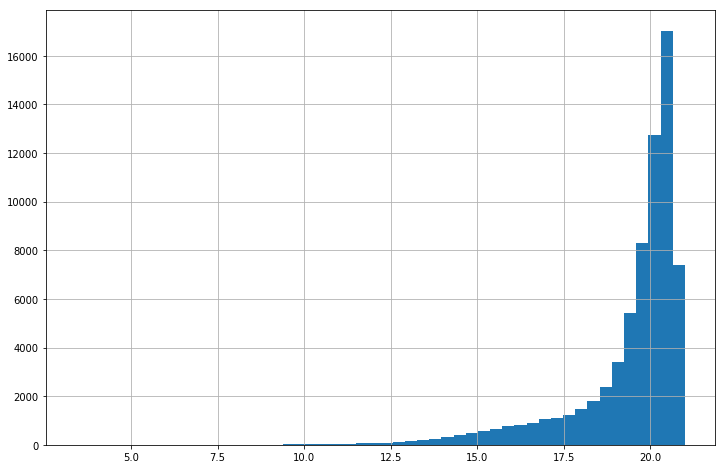

In [14]:
d.phot_g_mean_mag.hist(bins=50)

the same data projected in the G-parallax plane

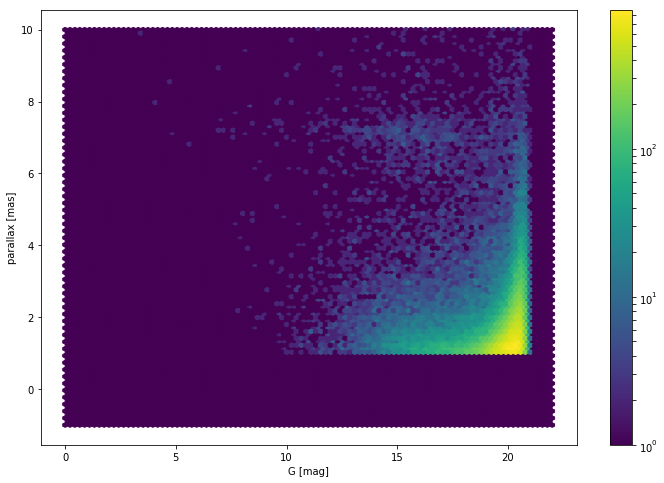

In [15]:
plt.hexbin(d.phot_g_mean_mag,d.parallax,extent=(0,22,-1,10),norm=mp.colors.LogNorm())
plt.xlabel("G [mag]")
plt.ylabel("parallax [mas]")
plt.colorbar()

all the converged 5 parameter solutions are located in their original healpix pixel 

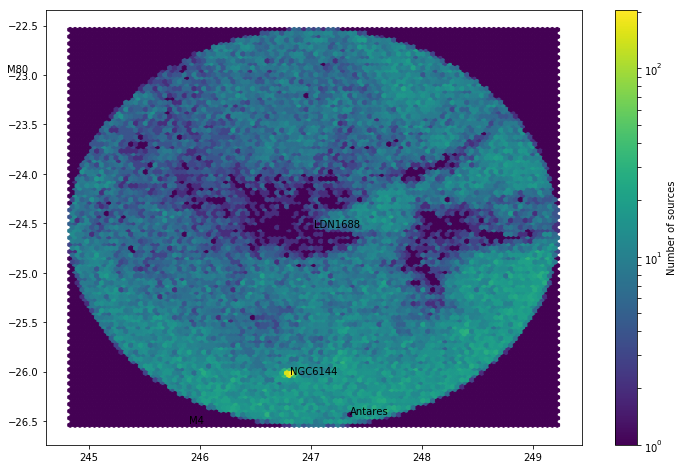

In [16]:
plt.hexbin(d.ra,d.dec,norm=mp.colors.LogNorm())
plt.text(M4.ra.deg,M4.dec.deg,'M4')
plt.text(M80.ra.deg,M80.dec.deg,'M80')
plt.text(Antares.ra.deg,Antares.dec.deg,'Antares')
plt.text(NGC6144.ra.deg,NGC6144.dec.deg,"NGC6144")
plt.text(LDN1688.ra.deg,LDN1688.dec.deg,"LDN1688")
plt.colorbar(label="Number of sources")

plotting the mean varpi one can see
* the Ophiuchus Molecular Cloud
* the systematic pattern (note in this region the pattern is banded)

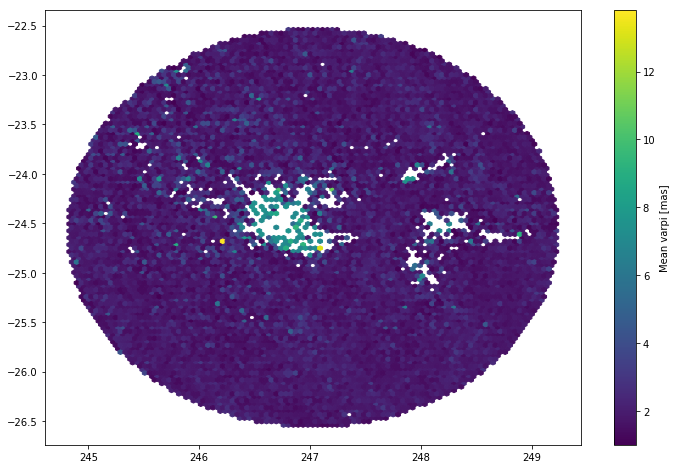

In [17]:
plt.hexbin(d.ra,d.dec,d.parallax)
plt.colorbar(label="Mean varpi [mas]")

using the healpix gnomian projection to preserve geometry

# Some selection in the center of the dark region

# proper motion selection

## main proper motion cluster

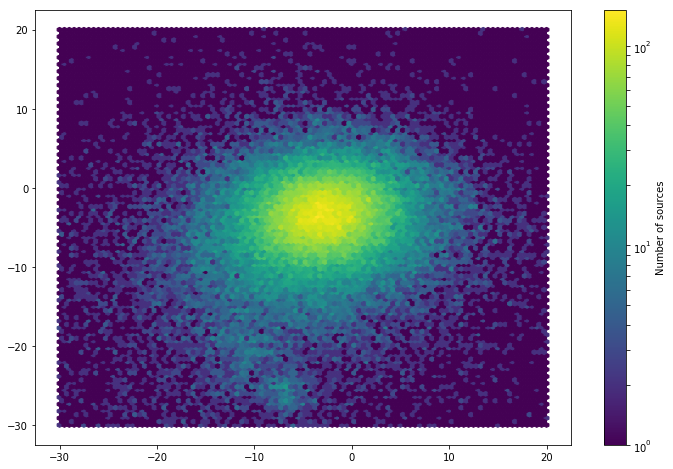

In [18]:
plt.hexbin(d.pmra,d.pmdec,norm=mp.colors.LogNorm(),extent=(-30,20,-30,20))
plt.colorbar(label="Number of sources")

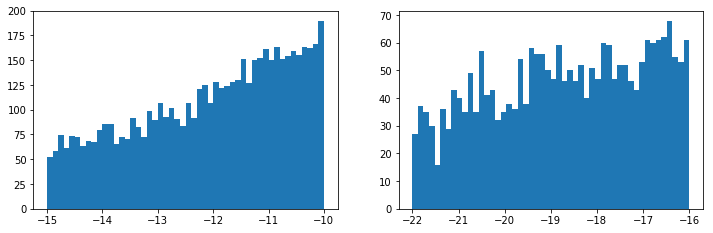

In [19]:
plt.subplot(221)
plt.hist(d.pmra,range=(-15,-10),bins=50);
plt.subplot(222)
plt.hist(d.pmdec,range=(-22,-16),bins=50);

In [20]:
d1=d[(np.abs(d.pmra+12.5)<2) & (np.abs(d.pmdec+19)<2)]

In [21]:
d1.source_id.count()

304

Text(0,0.5,'delta')

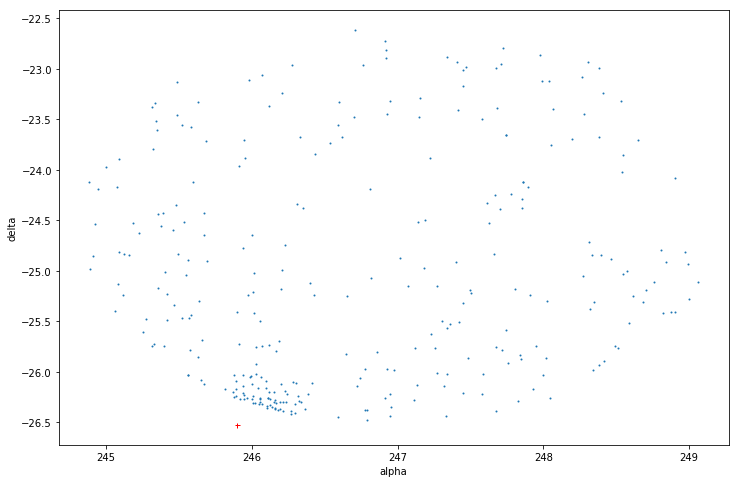

In [22]:
plt.scatter(d1.ra,d1.dec,s=1)
plt.plot(M4.ra.deg,M4.dec.deg,'r+',markersize=5)
plt.xlabel("alpha")
plt.ylabel("delta")

# Ophiuchus cloud selection in parallax and proper motion

In [23]:
d1=d[(d.parallax>5) & (d.parallax_over_error>5)].copy()

In [24]:
d1.source_id.count()

1678

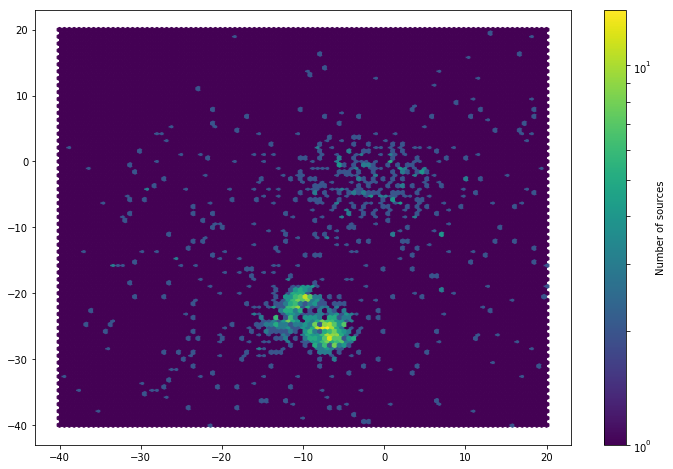

In [25]:
plt.hexbin(d1.pmra,d1.pmdec,norm=mp.colors.LogNorm(),extent=(-40,20,-40,20))
plt.colorbar(label="Number of sources")

(-100, 20)

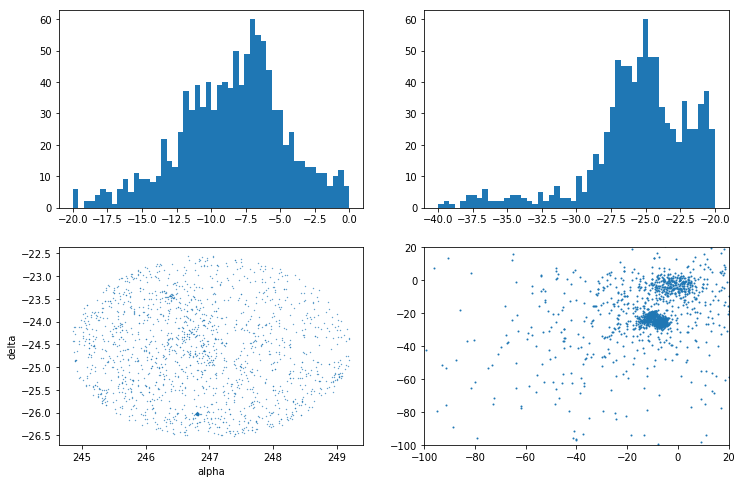

In [26]:
plt.subplot(221)
plt.hist(d1.pmra,range=(-20,0),bins=50);
plt.subplot(222)
plt.hist(d1.pmdec,range=(-40,-20),bins=50);
plt.subplot(223)
plt.scatter(d1.ra,d1.dec,s=0.1)
plt.xlabel("alpha")
plt.ylabel("delta")
plt.subplot(224)
plt.scatter(d1.pmra,d1.pmdec,s=1)
plt.xlim(-100,20)
plt.ylim(-100,20)

In [27]:
d2 = d1[(np.abs(d1.pmra+10)<8) & (np.abs(d1.pmdec+25)<8)].copy()

(-100, 20)

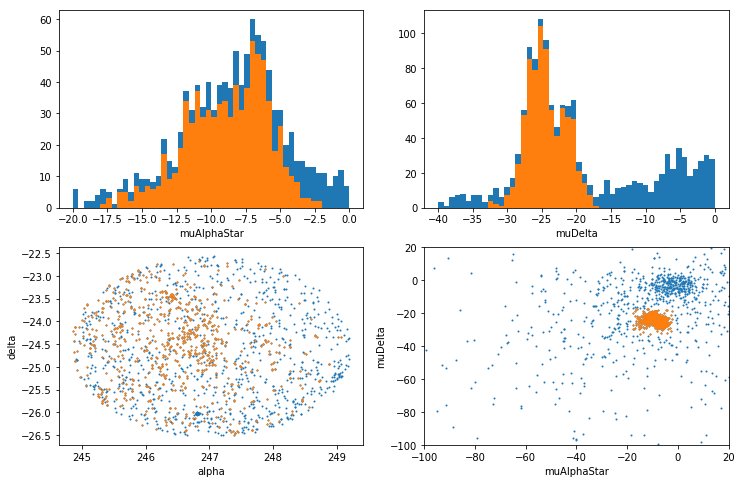

In [83]:
plt.subplot(221)
plt.hist(d1.pmra,range=(-20,0),bins=50);
plt.hist(d2.pmra,range=(-20,0),bins=50);
plt.xlabel("muAlphaStar")

plt.subplot(222)
plt.hist(d1.pmdec,range=(-40,0),bins=50);
plt.hist(d2.pmdec,range=(-40,0),bins=50);
plt.xlabel("muDelta")



plt.subplot(223)
plt.scatter(d1.ra,d1.dec,s=1)
plt.scatter(d2.ra,d2.dec,s=1)


plt.xlabel("alpha")
plt.ylabel("delta")
plt.subplot(224)
plt.scatter(d1.pmra,d1.pmdec,s=1)
plt.scatter(d2.pmra,d2.pmdec,s=1)
plt.xlabel("muAlphaStar")
plt.ylabel("muDelta")

plt.xlim(-100,20)
plt.ylim(-100,20)

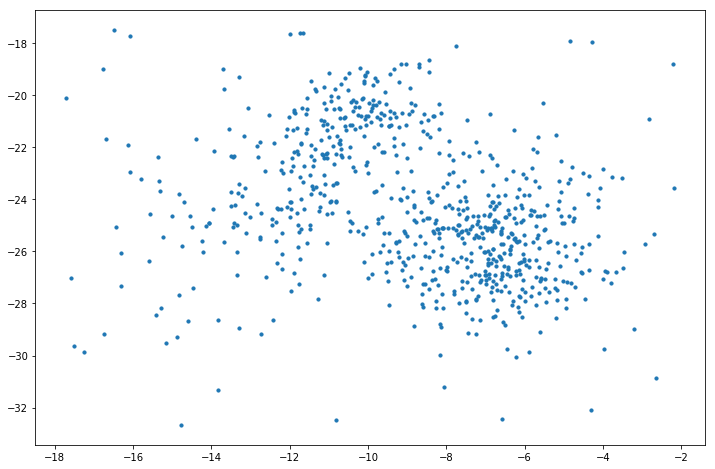

In [84]:
plt.scatter(d2.pmra,d2.pmdec,s=10)

In [86]:
d2.columns.values

array(['Unnamed: 0', 'solution_id', 'designation', 'source_id',
       'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error',
       'parallax', 'parallax_error', 'parallax_over_error', 'pmra',
       'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr',
       'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al',
       'astrometric_excess_noise', 'astrometric_excess_noise_sig',
       'astrometric_params_solved', 'astrometric_primary_flag',
       'astrometric_weight_al', 'astrometric_pseudo_colour',
       'astrometric_pseudo_colour_error', 'mean_varpi_factor_al',
       'astrometric_matched_observations', 'visibility_periods_used',
       'astrometric_sigma5d_max', 'frame_

only a few have radial valocities

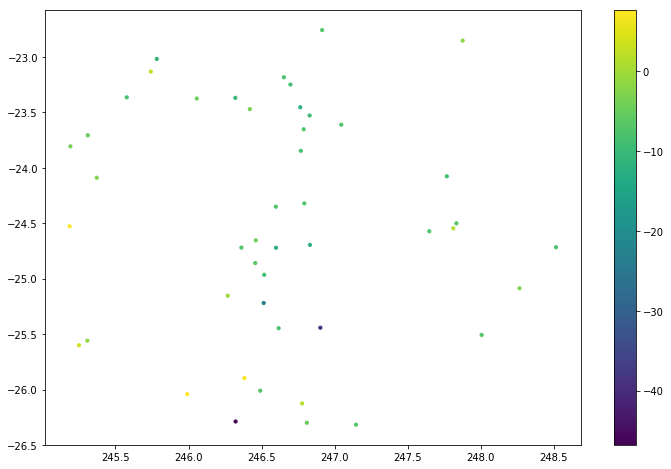

In [89]:
plt.scatter(d2.ra,d2.dec,c=d2.radial_velocity,s=10)
plt.colorbar()

In [30]:
d2['mag'] = d2.phot_g_mean_mag-5*np.log10(100/d2.parallax)
d2['mu'] = np.sqrt(d2.pmra**2+d2.pmdec**2)

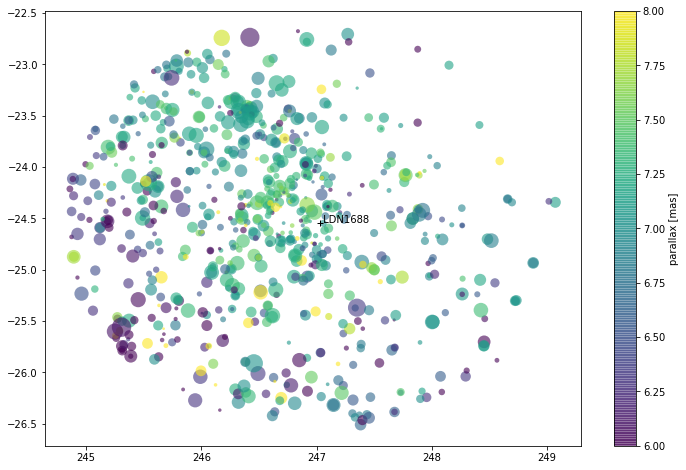

In [31]:
plt.scatter(d2.ra,d2.dec,s=10/d2.parallax_error,c=d2.parallax,vmin=6,vmax=8,alpha=0.6,lw=0)
plt.text(LDN1688.ra.deg,LDN1688.dec.deg," LDN1688")
plt.plot(LDN1688.ra.deg,LDN1688.dec.deg,"+",color="black")

plt.colorbar(label="parallax [mas]")

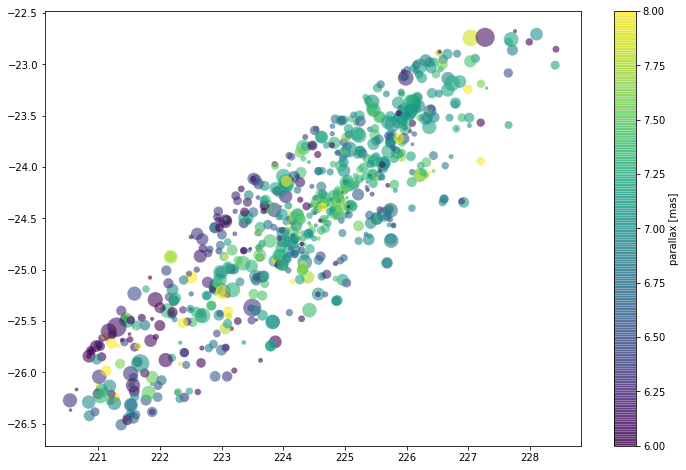

In [148]:
plt.scatter(d2.ra*np.cos(d2.dec*u.deg.to(u.rad)),d2.dec,s=10/d2.parallax_error,c=d2.parallax,vmin=6,vmax=8,alpha=0.6,lw=0)
plt.colorbar(label="parallax [mas]")

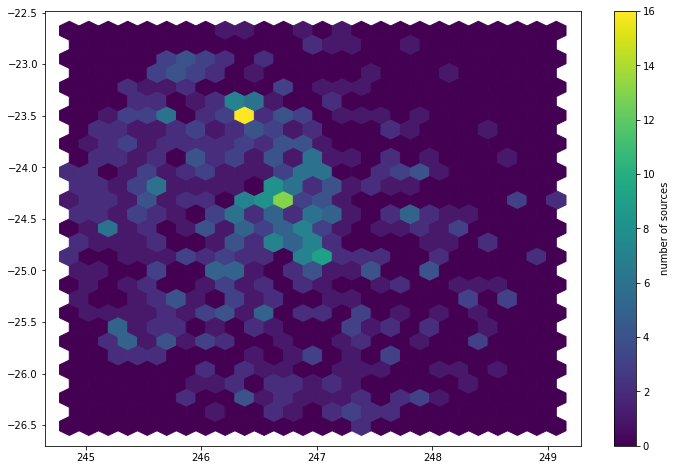

In [68]:
plt.hexbin(d2.ra,d2.dec,gridsize=25)
plt.colorbar(label="number of sources")

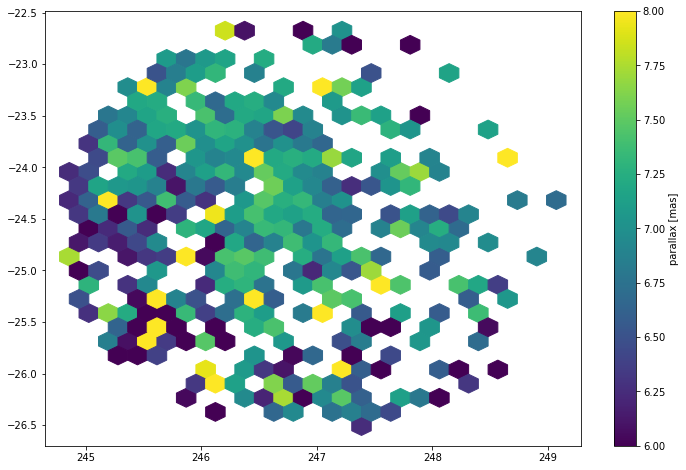

In [72]:
plt.hexbin(d2.ra,d2.dec,C=d2.parallax,gridsize=25,vmin=6,vmax=8)
plt.colorbar(label="parallax [mas]")

Text(0.5,0,'rough distance [pc]')

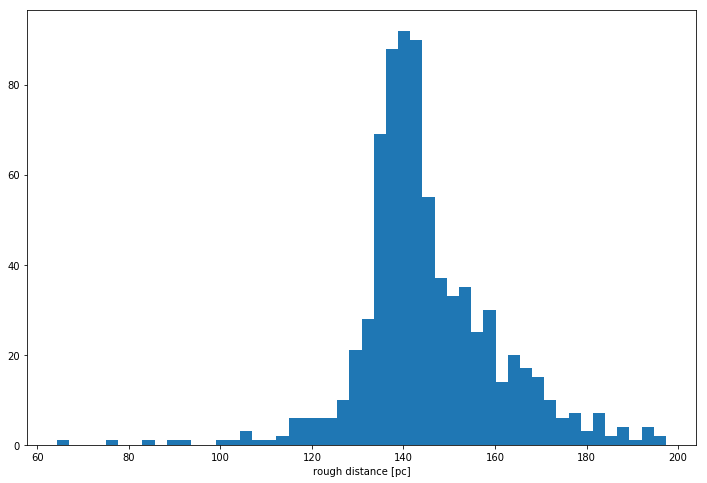

In [32]:
plt.hist(1000/d2.parallax,bins=50);
plt.xlabel("rough distance [pc]")

In [33]:
def plotProperMotion(d,ax,cmap=mp.cm.cool,norm=None) :
    muAs0 = d.pmra.median()
    muD0 = d.pmdec.median()
    mu = np.sqrt((d.pmra-muAs0)**2+(d.pmdec-muD0)**2)
    return ax.quiver(d.ra,d.dec,        # position
               d.pmra-muAs0, d.pmdec-muD0, # proper motion direction
               d.parallax, # proper motion strenght
               cmap=cmap,# colour map
               norm=norm,
               headlength=6)

In [34]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
vmin = 6
vmax = 9
levels = MaxNLocator(nbins=10).tick_values(vmin, vmax)
cmap = mp.cm.viridis
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

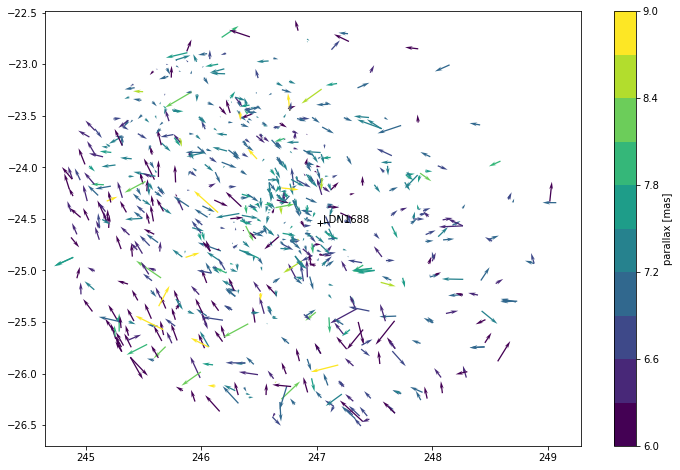

In [35]:
fig, ax = plt.subplots()
ax.text(LDN1688.ra.deg,LDN1688.dec.deg," LDN1688")
ax.plot(LDN1688.ra.deg,LDN1688.dec.deg,"+",color="black")
cf = plotProperMotion(d2,ax,cmap=cmap,norm=norm)
fig.colorbar(cf,ax=ax,label="parallax [mas]")

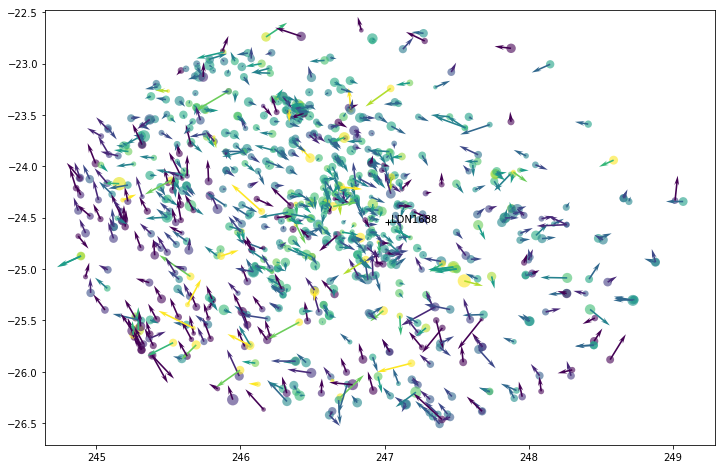

In [146]:
fig, ax = plt.subplots()
ax.scatter(d2.ra,d2.dec,s=(22-d2.phot_g_mean_mag)*10,c=d2.parallax,vmin=6,vmax=8,alpha=0.6,lw=0)
ax.text(LDN1688.ra.deg,LDN1688.dec.deg," LDN1688")
ax.plot(LDN1688.ra.deg,LDN1688.dec.deg,"+",color="black")
cf = plotProperMotion(d2,ax,cmap=cmap,norm=norm)

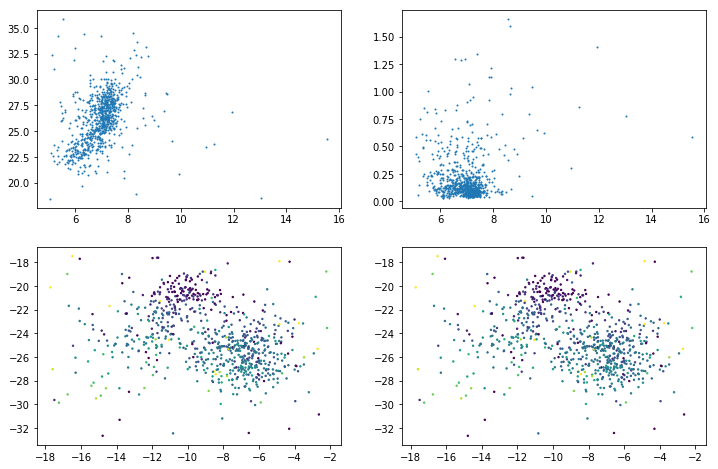

In [37]:
plt.subplot(221)
plt.scatter(d2.parallax,d2.mu,s=1)
plt.subplot(222)
plt.scatter(d2.parallax,d2.parallax_error,s=1)
plt.subplot(223)
plt.scatter(d2.pmra,d2.pmdec,s=2,c=d2.parallax,vmin=6,vmax=9)
plt.subplot(224)
plt.scatter(d2.pmra,d2.pmdec,s=2,c=d2.parallax,vmin=6,vmax=9)

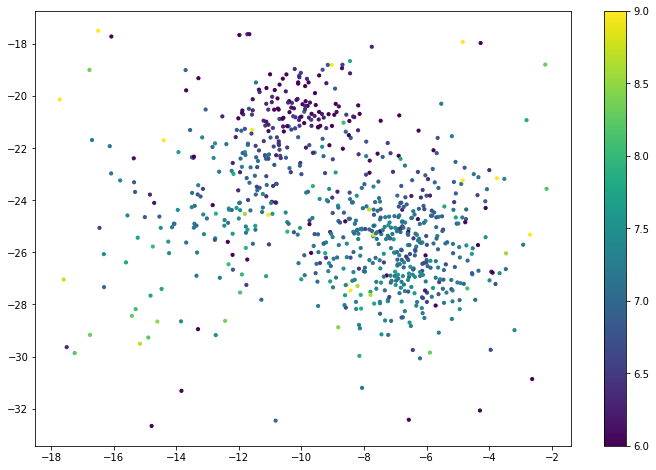

In [38]:
plt.scatter(d2.pmra,d2.pmdec,s=10,c=d2.parallax,vmin=6,vmax=9)
plt.colorbar()

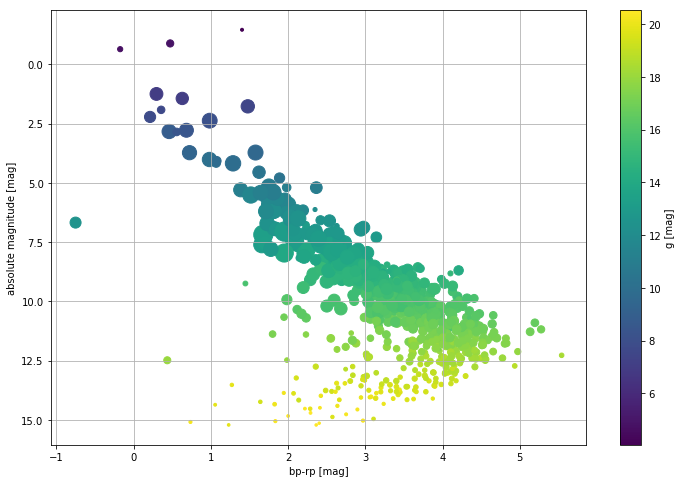

In [39]:
plt.scatter(d2.phot_bp_mean_mag-d2.phot_rp_mean_mag,d2.mag,s=10/d2.parallax_error,c=d2.phot_g_mean_mag)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("bp-rp [mag]")
plt.ylabel("absolute magnitude [mag]")
plt.colorbar(label="g [mag]")

In [40]:
d2.columns

Index(['Unnamed: 0', 'solution_id', 'designation', 'source_id', 'random_index',
       'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr',
       'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error',
       'mean_varpi_factor_al', 'astrometric_matched_observations',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'frame_rotator

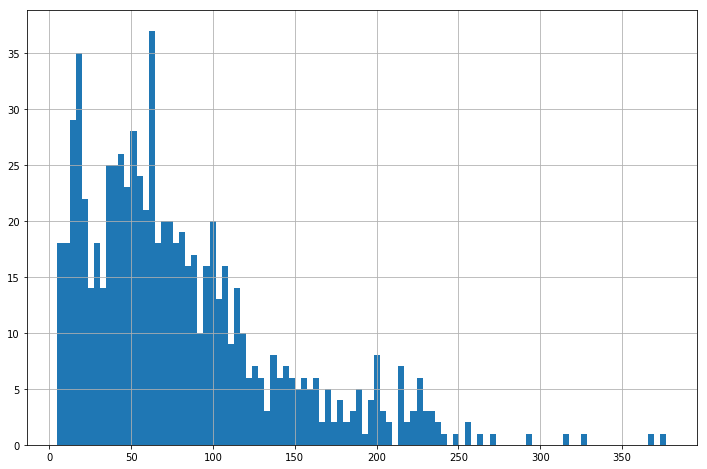

In [41]:
(d2.astrometric_pseudo_colour/d2.astrometric_pseudo_colour_error).hist(bins=100)

very redded sources

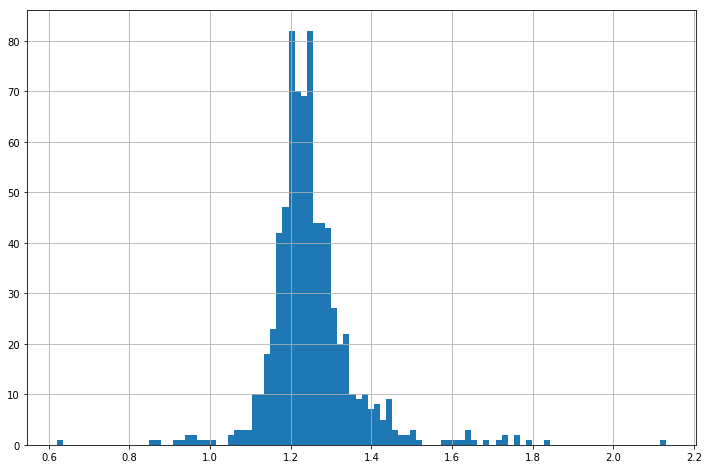

In [42]:
(d2.astrometric_pseudo_colour).hist(bins=100)

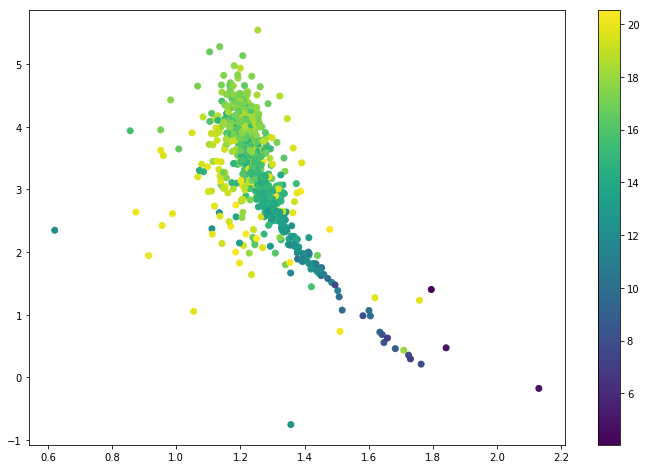

In [43]:
plt.scatter((d2.astrometric_pseudo_colour),d2.phot_bp_mean_mag-d2.phot_rp_mean_mag,c=d2.phot_g_mean_mag)
plt.colorbar()

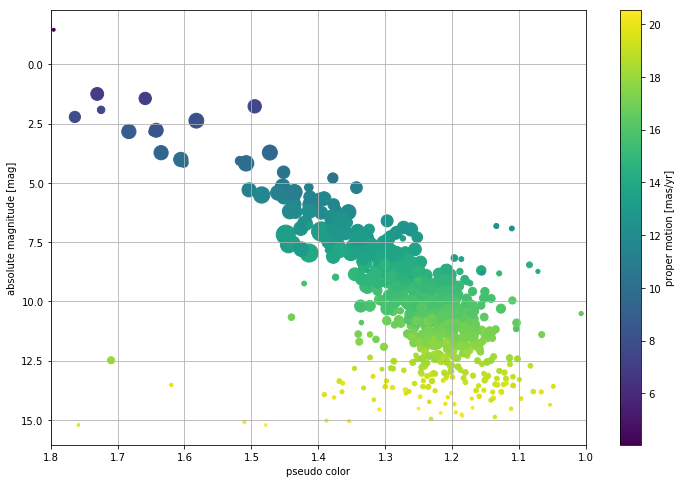

In [44]:
plt.scatter(d2.astrometric_pseudo_colour,d2.mag,s=10/d2.parallax_error,c=d2.phot_g_mean_mag)
plt.xlim(1,1.8)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.grid()
plt.xlabel("pseudo color")
plt.ylabel("absolute magnitude [mag]")
plt.colorbar(label="proper motion [mas/yr]")

# 3D

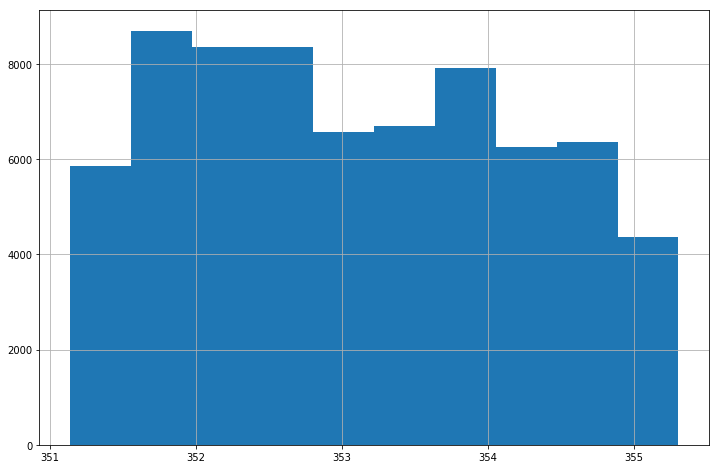

In [131]:
d.l.hist()

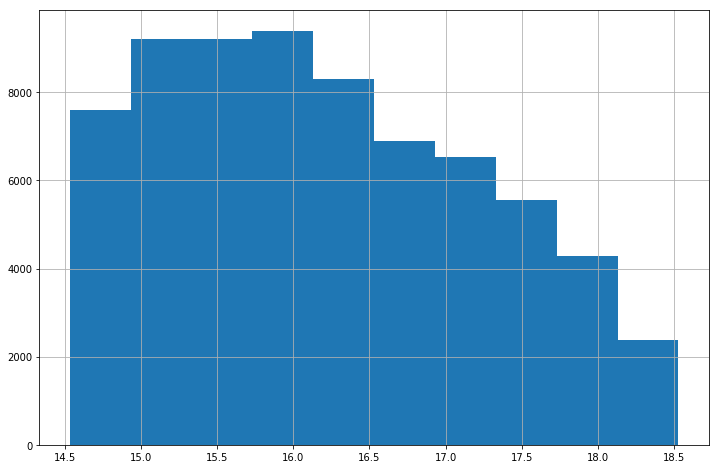

In [132]:
d.b.hist()

In [157]:
def addXYZ(df) :
    """Gaia archive ra and dec are in degree"""
    alpha = df.ra*u.deg.to(u.rad)
    delta = df.dec*u.deg.to(u.rad)
    d = 1/ df.parallax #brut force
    df['x'] = d * np.cos(delta)* np.cos(alpha)
    df['y'] = d * np.cos(delta)* np.sin(alpha)
    df['z'] = d * np.sin(delta) 

In [150]:
addXYZ(d2)

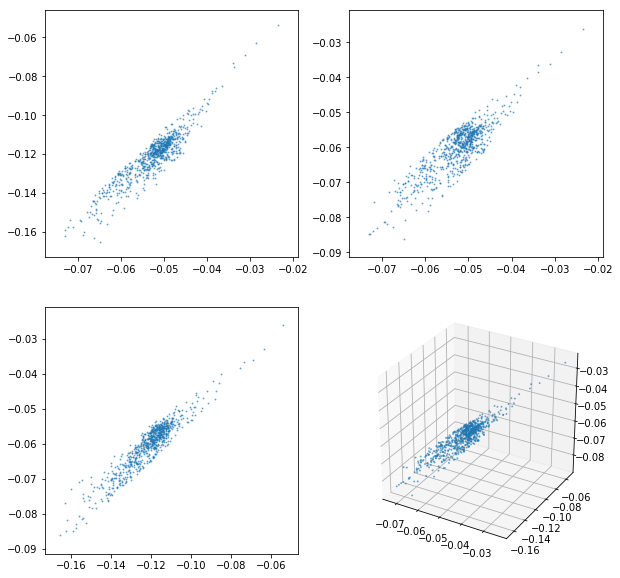

In [151]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(d2.x,d2.y,alpha=0.5,s=1)
ax = fig.add_subplot(222)
ax.scatter(d2.x,d2.z,alpha=0.5,s=1)
ax = fig.add_subplot(223)
ax.scatter(d2.y,d2.z,alpha=0.5,s=1)
ax = fig.add_subplot(224, projection='3d')
ax.scatter(d2.x,d2.y,d2.z,alpha=0.5,s=1)

In [152]:
import plotly
import plotly.graph_objs as go
import numpy as np

In [153]:
trace1 = go.Scatter3d(
    x=d2.x,
    y=d2.y,
    z=d2.z,
    mode='markers',
    marker=dict(
        size=22-d2.phot_g_mean_mag,
        color=d2.mu,
        colorscale='Viridis',
        line=dict(
            color=d2.mu,
            width=1,
        ),
        opacity=0.5
    )
)

In [154]:
trace1 = go.Scatter3d(
    x=d2.x,
    y=d2.y,
    z=d2.z,
    mode='markers',
    marker=dict(
        size=22-d2.phot_g_mean_mag,
        color=d2.mu,
        colorscale='Viridis',
        opacity=0.4
    )
)

In [155]:
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)

In [156]:
plotly.offline.init_notebook_mode(connected=True)

explore the plot with plotly https://plot.ly/~A.Bombrun/1

In [144]:
plotly.offline.iplot(fig)